## **This project involves analyzing sales data to identify patterns, trends, and insights that can help in understanding customer behavior.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches


In [2]:
df = pd.read_csv(r"C:/Users/user/OneDrive/Desktop/Dataset/New Year Sales portfoloi 1  Data.csv", encoding='cp1252')


In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


## *Cleaning Data *

In [5]:
df.drop('Status', axis=1, inplace=True)
df.drop('unnamed1', axis=1, inplace=True)


In [6]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df = df.dropna(subset=['Amount'])


In [9]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df = df.dropna(subset=['Amount']).copy() 
df['Amount'] = df['Amount'].astype(int)


In [11]:
df.describe(include='all')

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,1.123900e+04,11239,11239,11239,11239,11239.000000,11239.000000,11239,11239,11239,11239,11239.000000,11239.000000
unique,NaN,1250,2350,2,7,NaN,NaN,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7832,4541,NaN,NaN,1944,4289,1583,2655,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.410357,0.420055,NaN,NaN,NaN,NaN,2.489634,9453.610553
std,1.716039e+03,NaN,NaN,NaN,NaN,12.753866,0.493589,NaN,NaN,NaN,NaN,1.114967,5222.355168
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,5443.000000
50%,1.003064e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,1.004426e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12675.000000


In [12]:
df.nunique()


User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

## **Exploratory Data Analysis (EDA)**

## **Gender Analysis:**
### *Which gender has a higher purchasing power?*

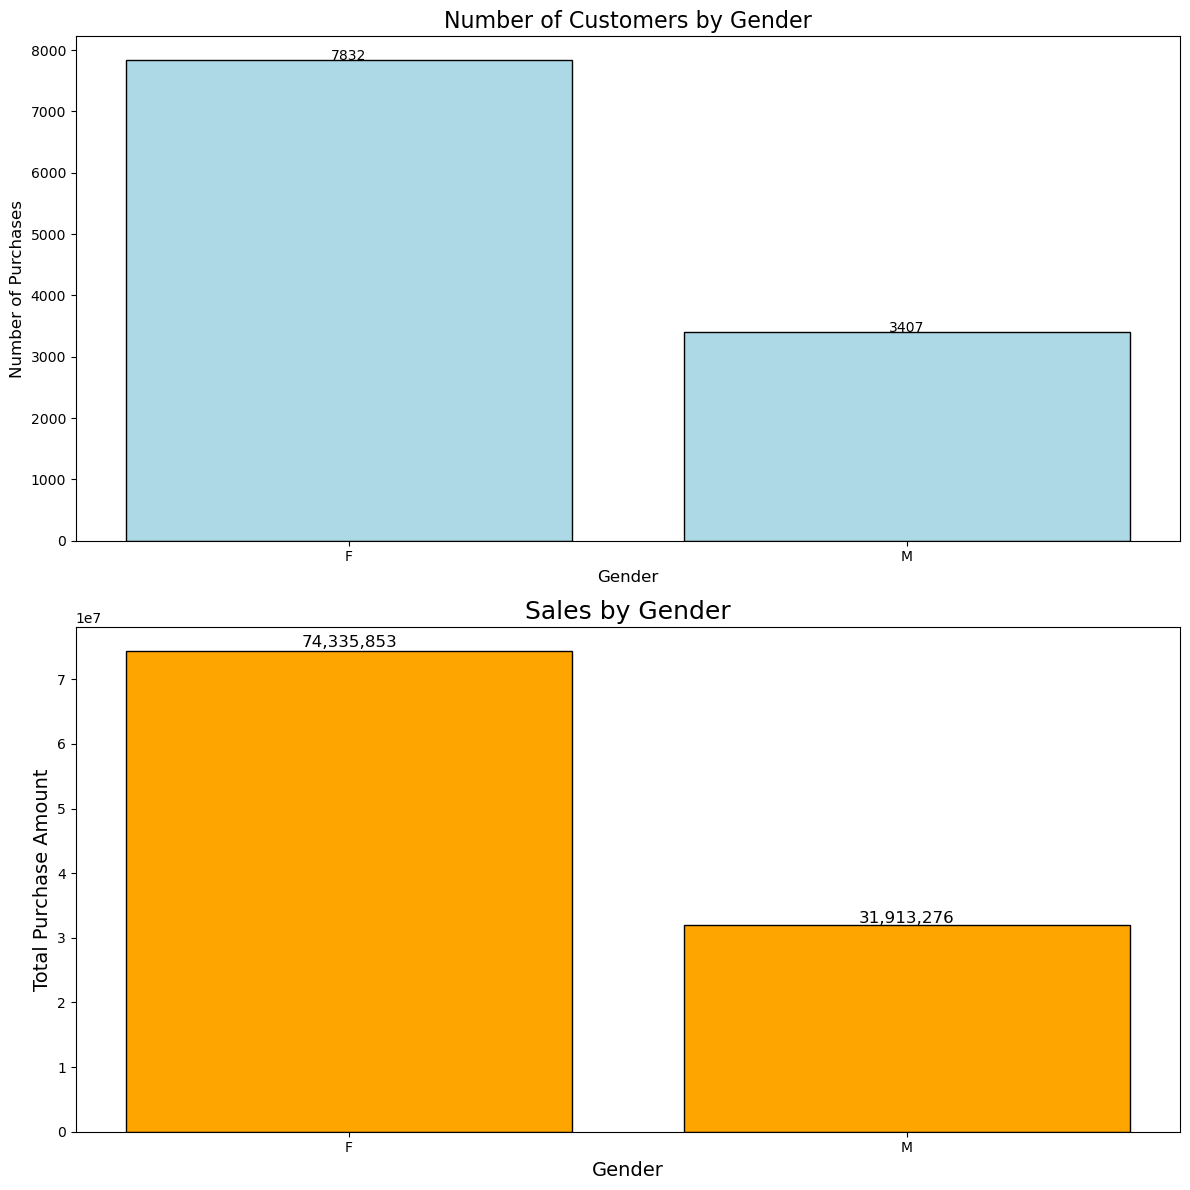

In [13]:
count_of_gender=df['Gender'].value_counts()
sales_by_gender = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,12))

#Subplot1:
plt.subplot(2,1,1)
bars1 = plt.bar(count_of_gender.index, count_of_gender.values, color='lightblue', edgecolor='black')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, str(int(yval)), ha='center', fontsize=10)

plt.title("Number of Customers by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)

#Subplot2:
plt.subplot(2,1,2)
bars = plt.bar(sales_by_gender.index, sales_by_gender.values, color='orange', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{int(yval):,}', ha='center', fontsize=12)
plt.title("Sales by Gender", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Total Purchase Amount", fontsize=14)

plt.tight_layout()
plt.show()


## **Age Group Analysis:**
### *Which age group has the most purchases, and is there a trend in purchasing power by age?*


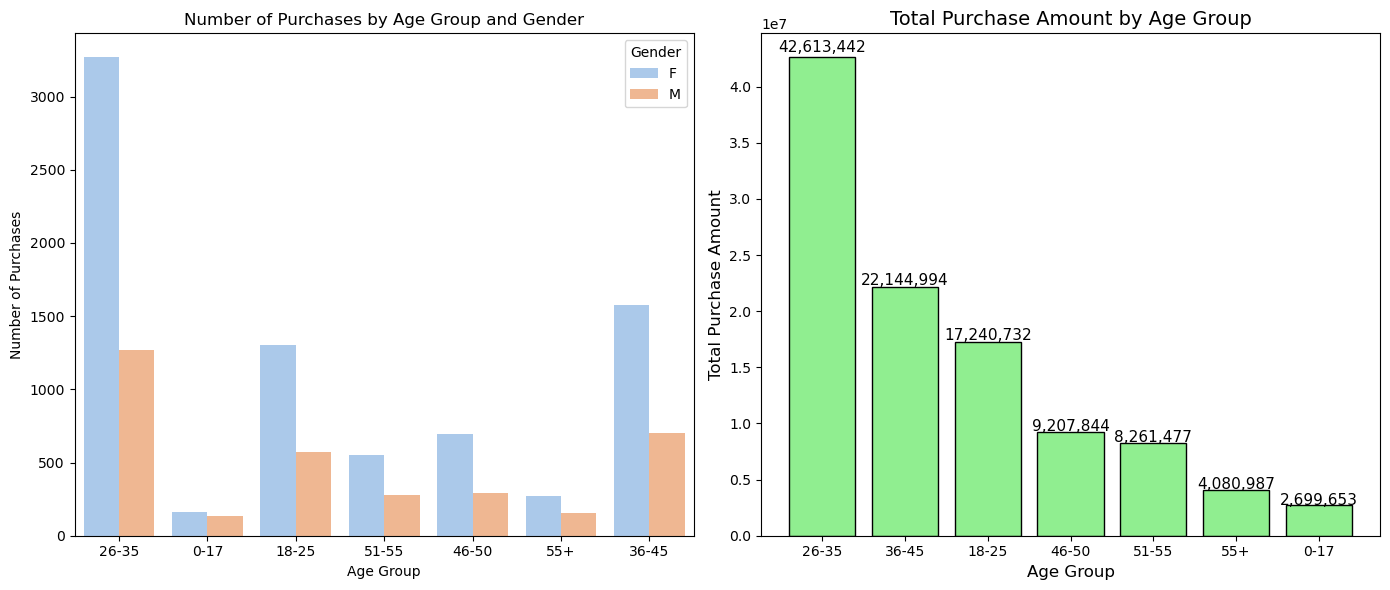

In [14]:
sales_by_agegroup = df.groupby('Age Group')["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))

# --- Subplot 1:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Age Group", hue="Gender", palette='pastel')
plt.title("Number of Purchases by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")

# --- Subplot 2: 
plt.subplot(1, 2, 2)
bars = plt.bar(sales_by_agegroup.index, sales_by_agegroup.values, color='lightgreen', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{int(yval):,}', ha='center', fontsize=11)

plt.title("Total Purchase Amount by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)

plt.tight_layout()
plt.show()


## **State Analysis:**
### *Which states generate the highest number of orders and revenue?*

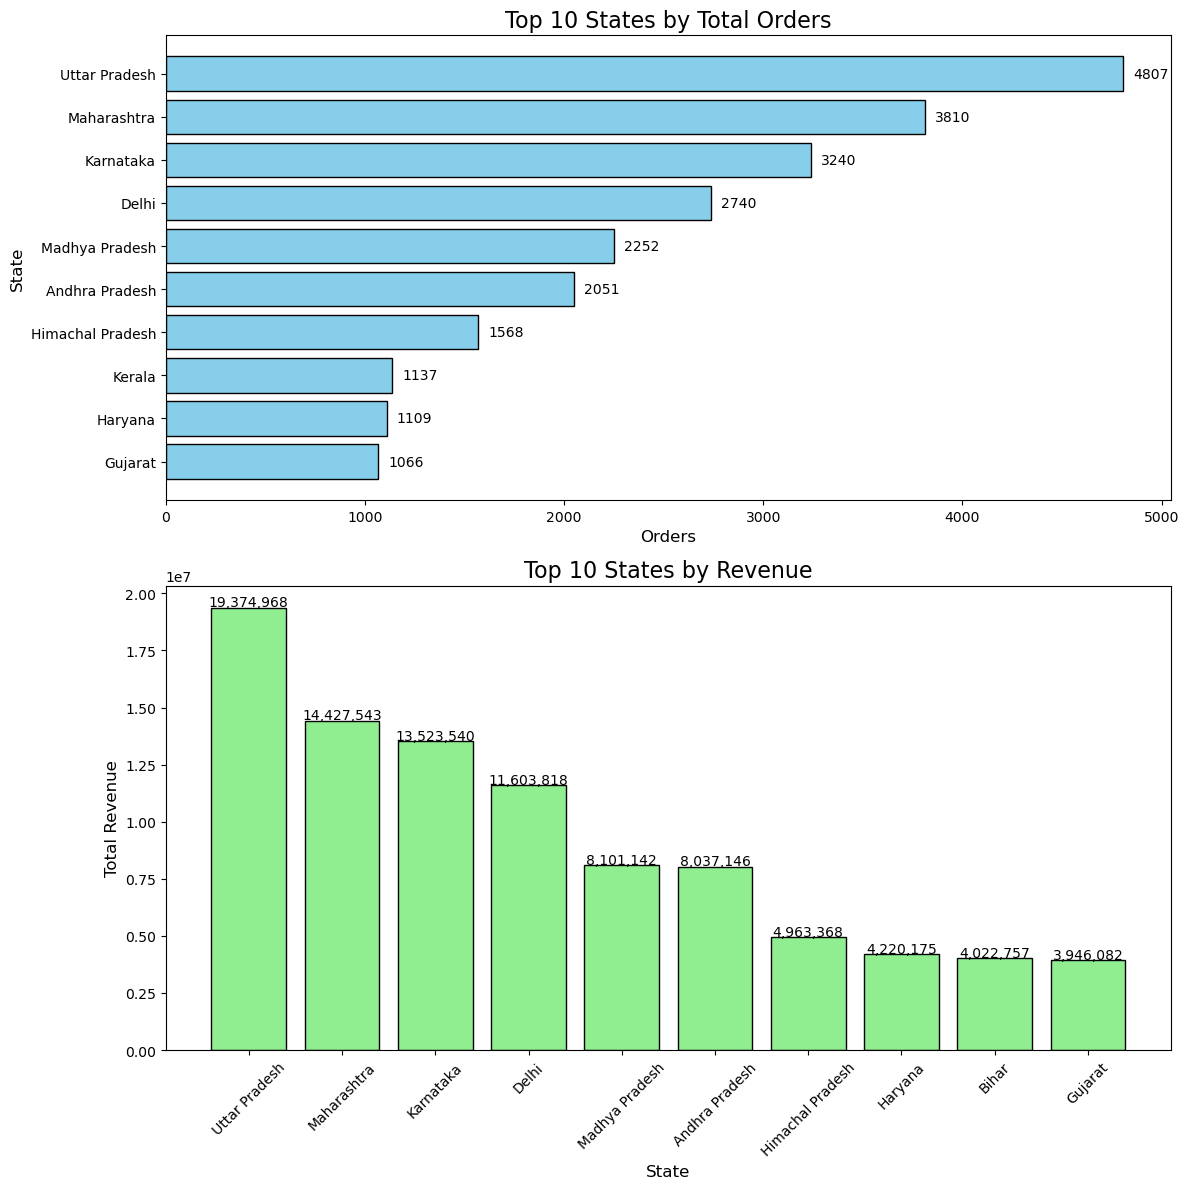

In [15]:
orders_by_state = df.groupby('State')["Orders"].sum().sort_values(ascending=False).head(10)
revenue_per_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,12))

# Subplot 1
plt.subplot(2,1,1)
bars = plt.barh(orders_by_state.index, orders_by_state.values, color='skyblue', edgecolor='black')
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 50, bar.get_y() + bar.get_height()/2, f'{int(xval)}', va='center', fontsize=10)

plt.title('Top 10 States by Total Orders', fontsize=16)
plt.xlabel('Orders', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.gca().invert_yaxis()

# Subplot 2:
plt.subplot(2,1,2)
bars = plt.bar(revenue_per_state.index, revenue_per_state.values, color='lightgreen', edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000, f'{int(yval):,}', ha='center', fontsize=10)

plt.title("Top 10 States by Revenue", fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## **Marital Status Analysis:**
### *How does marital status affect purchasing behavior?*

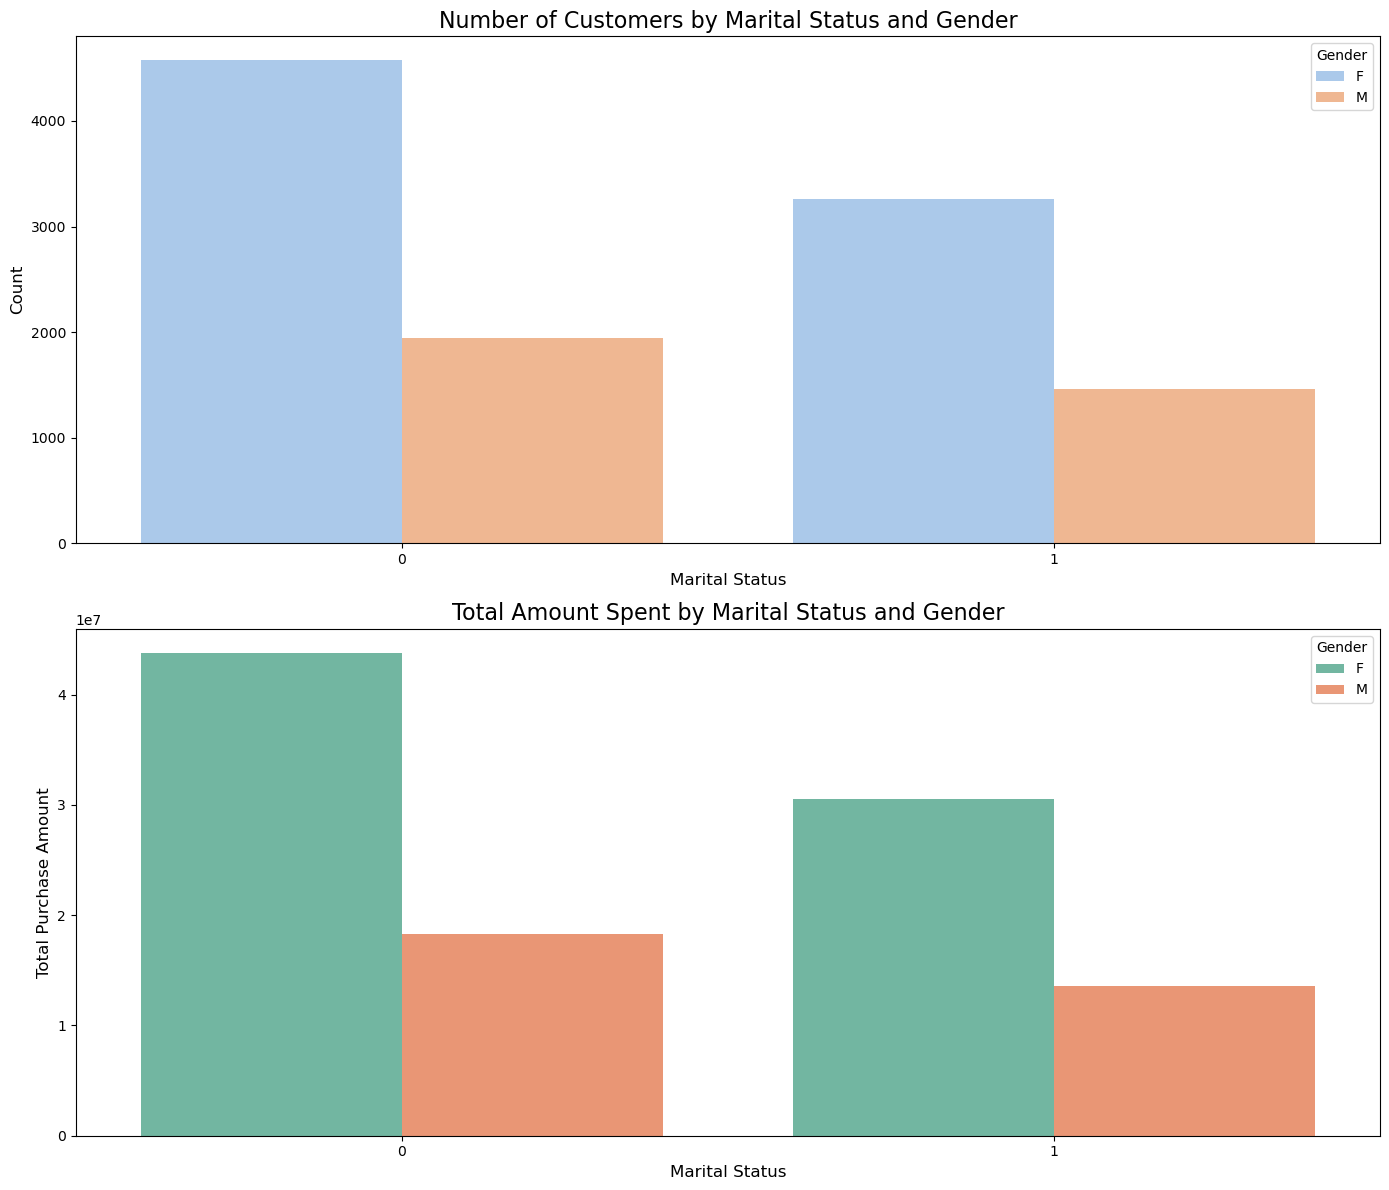

In [16]:


plt.figure(figsize=(14, 12))

#  Plot 1:
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='Marital_Status', hue='Gender', palette='pastel')
plt.title("Number of Customers by Marital Status and Gender", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

#  Plot 2:
plt.subplot(2, 1, 2)
grouped = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

sns.barplot(data=grouped, x='Marital_Status', y='Amount', hue='Gender', palette='Set2')
plt.title("Total Amount Spent by Marital Status and Gender", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)

plt.tight_layout()
plt.show()


## **Occupation Analysis:**
### *Which occupations contribute most to sales?*

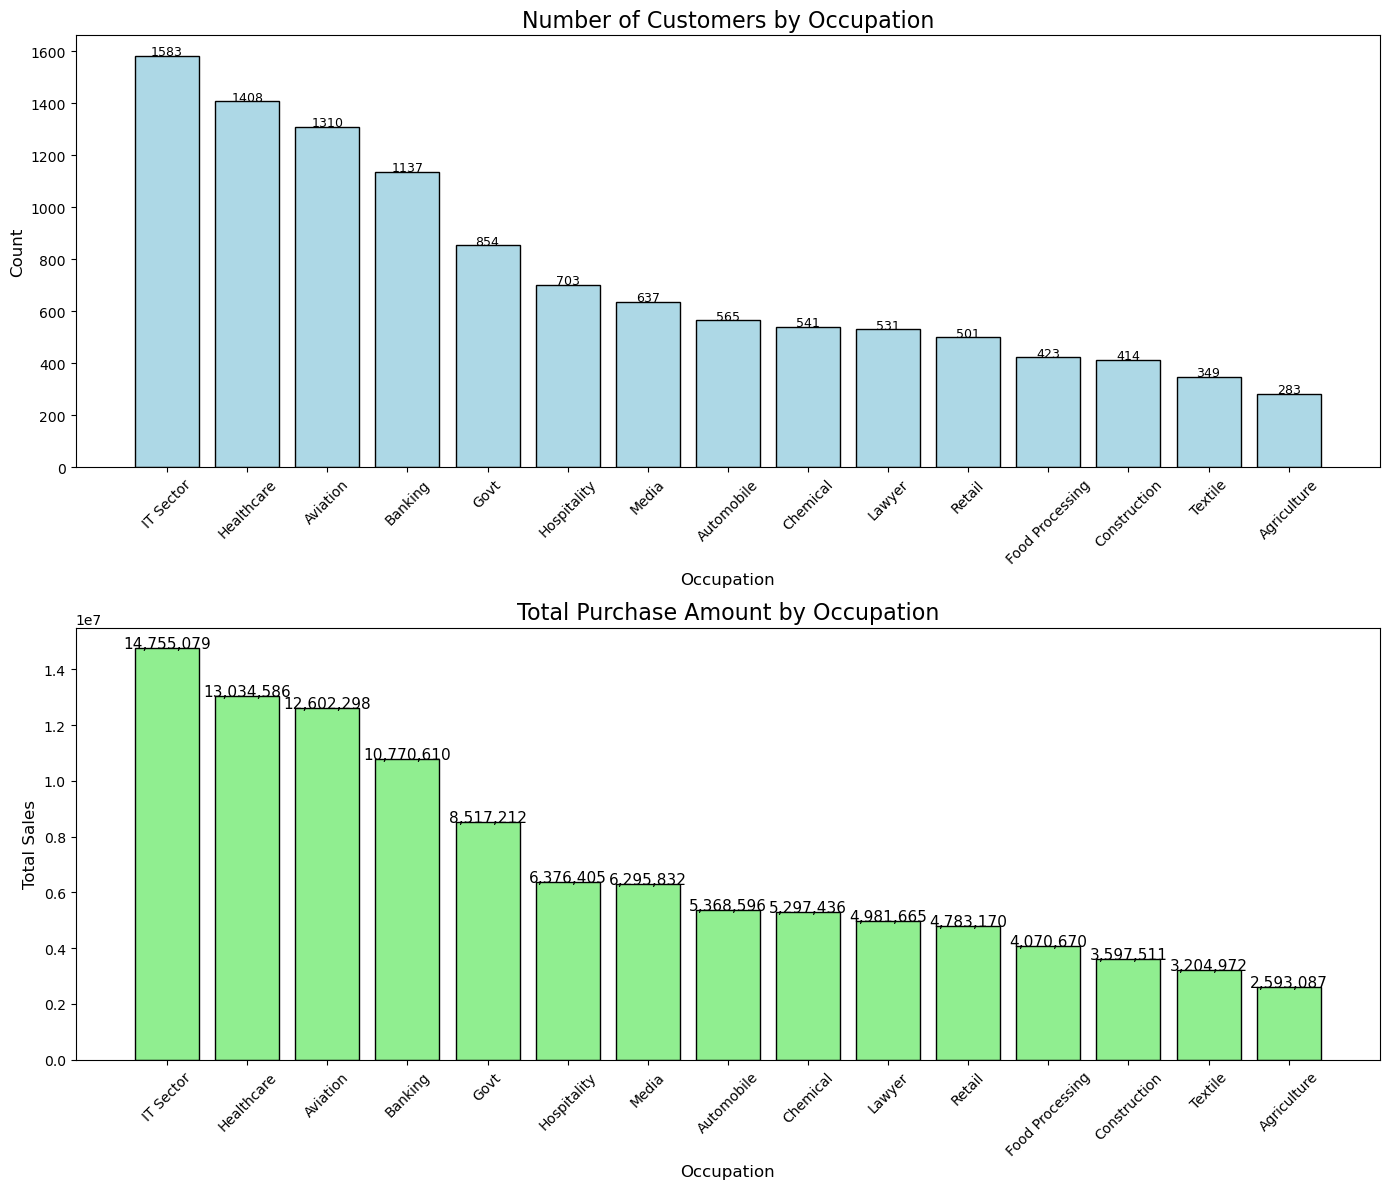

In [17]:

occupation_count = df['Occupation'].value_counts()
sales_by_occupation = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 12))

#  Subplot 1
plt.subplot(2, 1, 1)
bars1 = plt.bar(occupation_count.index, occupation_count.values, color='lightblue', edgecolor='black')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, str(int(yval)), ha='center', fontsize=9)

plt.title("Number of Customers by Occupation", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)

#  Subplot 2:
plt.subplot(2, 1, 2)
bars2 = plt.bar(sales_by_occupation.index, sales_by_occupation.values, color='lightgreen', edgecolor='black')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, f"{int(yval):,}", ha='center', fontsize=11)

plt.title("Total Purchase Amount by Occupation", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



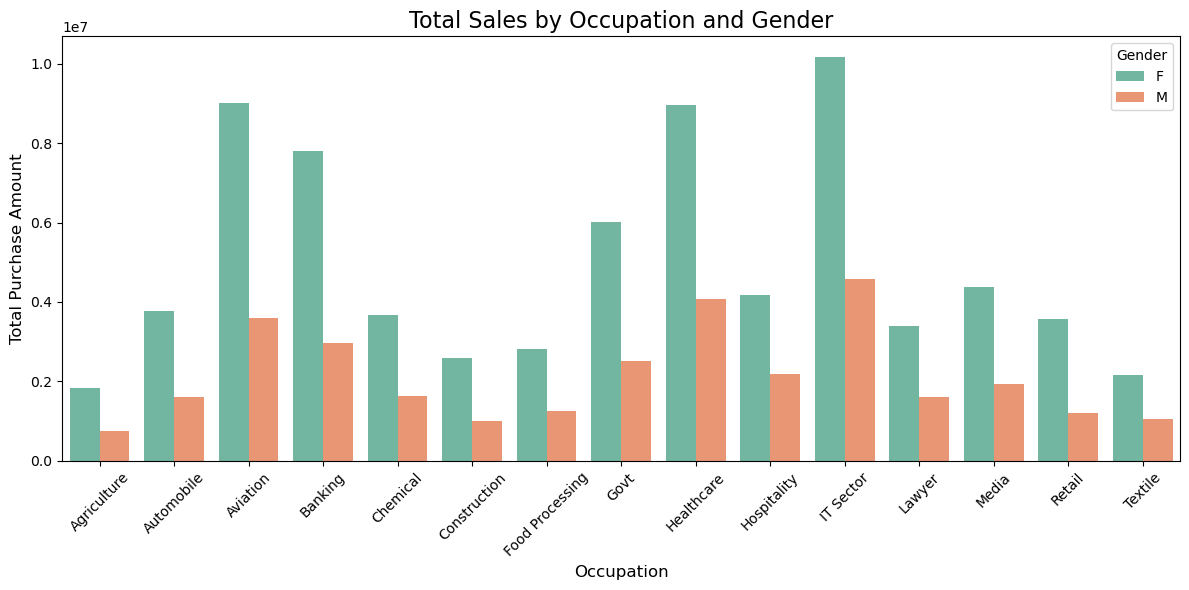

In [18]:
grouped = df.groupby(['Occupation', 'Gender'])['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=grouped, x='Occupation', y='Amount', hue='Gender', palette='Set2')

plt.title("Total Sales by Occupation and Gender", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Product Category Analysis:**
### *What product categories are the most popular, and which ones generate the most revenue?*

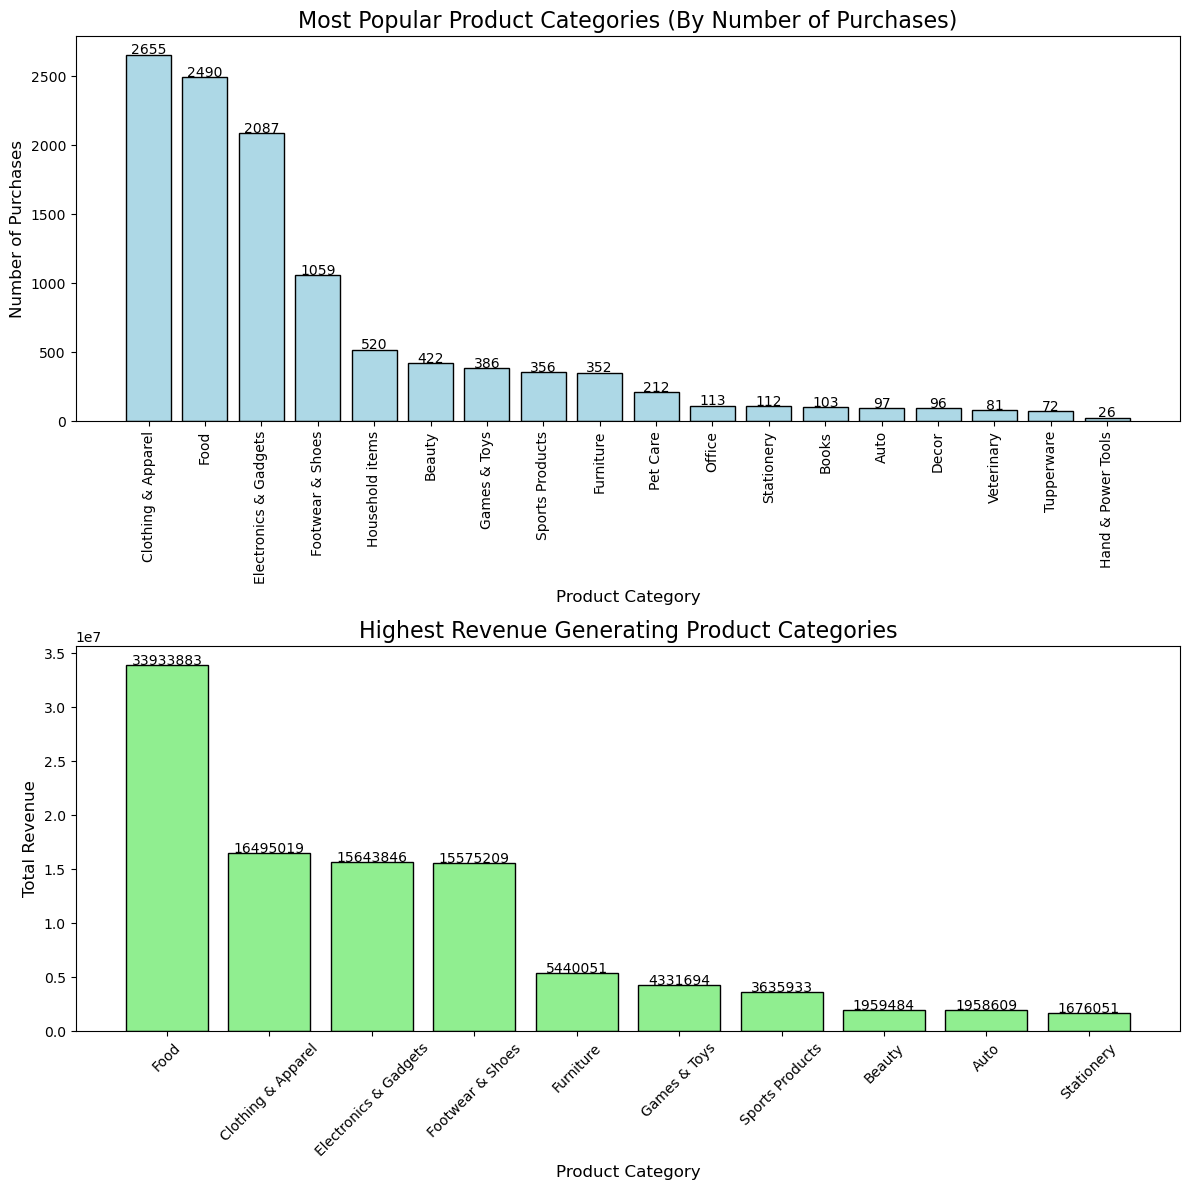

In [19]:
product_category_count=df['Product_Category'].value_counts()
sales_by_product_category=df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,12))

#Subplot1:
plt.subplot(2,1,1)
bars=plt.bar(product_category_count.index,product_category_count.values,color='lightblue',edgecolor='black')
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2,yval+2,f'{int(yval)}', ha='center',fontsize=10)
plt.title("Most Popular Product Categories (By Number of Purchases)", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.xticks(rotation=90)

#Subplot2:
plt.subplot(2,1,2)
bars=plt.bar(sales_by_product_category.index,sales_by_product_category.values,color='lightgreen',edgecolor='black')
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2,yval+5000, f'{int(yval)}', ha='center',fontsize=10)
plt.title("Highest Revenue Generating Product Categories", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

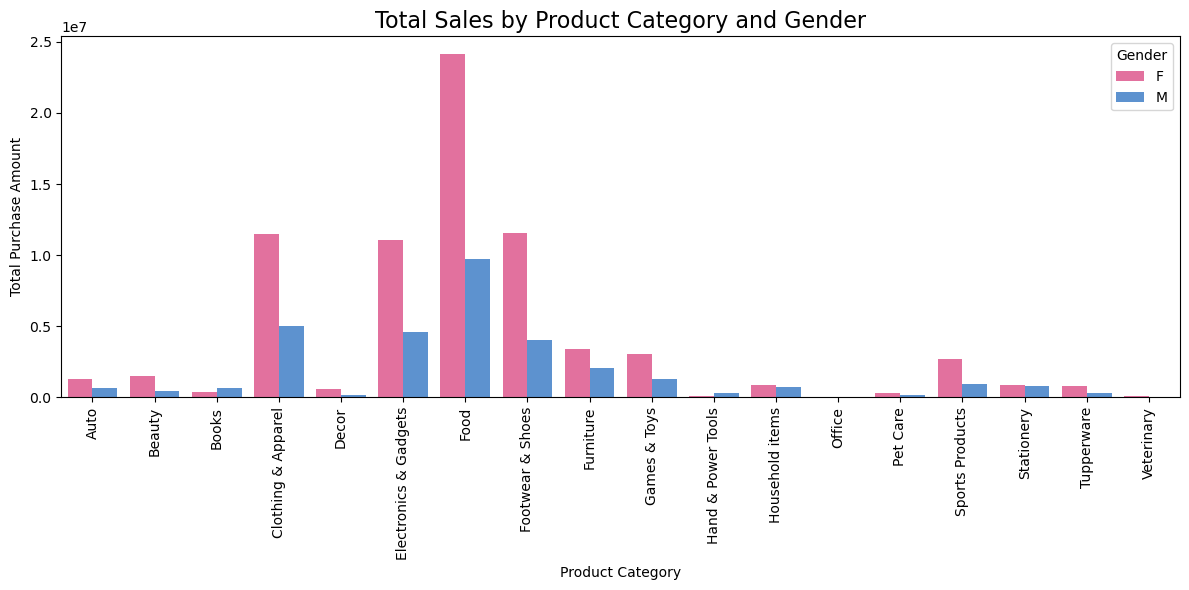

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Product Category and Gender, then sum Amount
grouped = df.groupby(['Product_Category', 'Gender'])['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped,
    x='Product_Category',
    y='Amount',
    hue='Gender',
    palette={'M': '#4A90E2', 'F': '#F55E9A'}  # You can change to any color you like
)

plt.title("Total Sales by Product Category and Gender", fontsize=16)
plt.xlabel("Product Category")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## **CONCLUSION**

### *This customer purchase analysis revealed key trends across demographics like gender, age, occupation, and location. *Female* customers showed slightly higher spending than males, and the *26–35* age group  is the top contributor in both number of purchases and total amount spent. Occupation-wise, *IT Sector*,*Healthcare* & *Aviation* Sectors were the highest spenders.In terms of Product Category ,most number of orders are in *Clothing & Apparel* while in terms of revenue  *Food* Sector tops the list . Married individuals also showed higher purchasing activity compared to singles.States like *Uttar Pradesh* & *Maharashtra* generated the most orders and revenue.*

